# Interest-rate curves #
## 11. A glitch in forward-rate curves ##

In [7]:
import pandas as pd
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy

In [2]:
today = ql.Date(24, ql.August, 2015)
ql.Settings.instance().evaluationDate = today

### The statement of the case ###

In [3]:
dates = [today] + [today + ql.Period(i, ql.Years) for i in [1, 2, 3, 5, 10, 20]]
forwards = [0.01, 0.03, 0.02, 0.025, 0.035, 0.05, 0.04]
curve = ql.ForwardCurve(dates, forwards, ql.Actual360())

In [4]:
pd.DataFrame(list(curve.nodes()),
             columns = ('date', 'rate'),
             index = ['']*len(dates))

,date,rate
,"August 24th, 2015",0.010
,"August 24th, 2016",0.030
,"August 24th, 2017",0.020
,"August 24th, 2018",0.025
,"August 24th, 2020",0.035
,"August 24th, 2025",0.050
,"August 24th, 2035",0.040


In [5]:
d = today + ql.Period(4, ql.Years)
print(d)
print(curve.forwardRate(d, d, curve.dayCounter(), ql.Continuous))

August 24th, 2019
3.500000 % Actual/360 continuous compounding


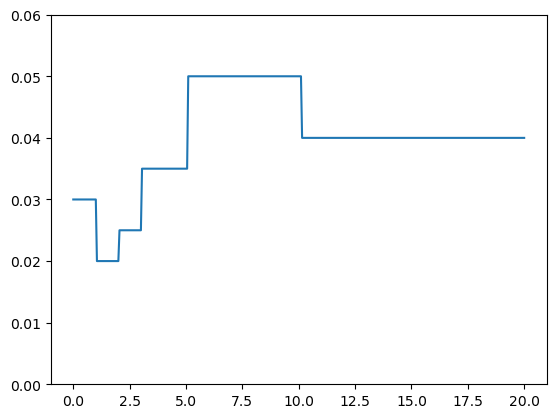

In [8]:
sample_times = numpy.linspace(0.0, 20.0, 401)
sample_rates = [curve.forwardRate(t, t, ql.Continuous).rate() for t in sample_times]
f, ax = plt.subplots()
ax.set_ylim(0.0, 0.06)
_ = ax.plot(sample_times, sample_rates)

In [10]:
dates, expected = zip(*curve.nodes())
rates = [curve.forwardRate(d, d, curve.dayCounter(), ql.Continuous).rate() for d in dates]
pd.DataFrame(zip(dates, expected, rates),
             columns = ('date', 'expected', 'retrieved'),
             index = [''] * len(dates))

,date,expected,retrieved
,"August 24th, 2015",0.010,0.0300
,"August 24th, 2016",0.030,0.0250
,"August 24th, 2017",0.020,0.0225
,"August 24th, 2018",0.025,0.0300
,"August 24th, 2020",0.035,0.0425
,"August 24th, 2025",0.050,0.0450
,"August 24th, 2035",0.040,0.0400


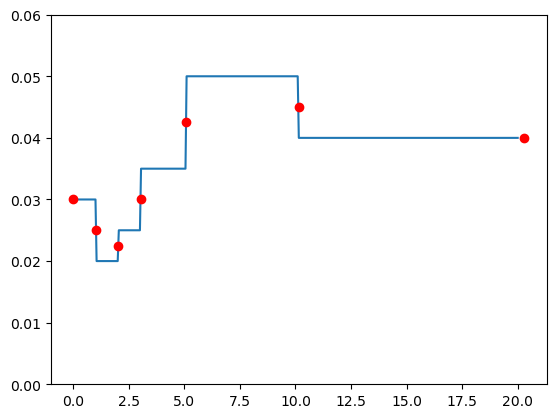

In [11]:
node_times = [curve.dayCounter().yearFraction(today, d) for d in dates]
ax.plot(node_times, rates, 'o', color='red')
display(f)